In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

import pandas as pd
import matplotlib.pyplot as plt

### Prepare all basic variable

In [39]:
path_data = os.environ.get("PATH_TRAIN_RESULT")

In [49]:
df_result = pd.DataFrame({
    'loss': [0], 'auc': [0],
    'tp': [0], 'tn': [0], 'fp': [0],'fn': [0],
    'val_loss': [0], 'val_auc': [0],
    'val_tp': [0], 'val_tn': [0], 'val_fp': [0], 'val_fn': [0]
})

for fold in range(1, 6):
    temp = pd.read_csv(os.path.join(path_data, f"s1_mobilenet_v2_refuge_f{fold}.csv"))
    df_result = pd.concat([df_result, temp], axis=0)

df_result.reset_index(names='epoch', inplace=True)
df_result.loc[df_result.auc == 0, 'epoch'] = -1

df_result

,epoch,loss,auc,tp,tn,fp,fn,val_loss,val_auc,val_tp,val_tn,val_fp,val_fn
0,-1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0,0.519069,0.571704,715.0,4.0,80.0,41.0,0.329362,0.898148,103.0,5.0,7.0,5.0
2,1,0.248984,0.826318,741.0,22.0,62.0,15.0,0.269927,0.934028,108.0,0.0,12.0,0.0
3,2,0.208556,0.884259,751.0,29.0,55.0,5.0,0.314751,0.903164,108.0,1.0,11.0,0.0
4,3,0.214061,0.864308,747.0,34.0,50.0,9.0,0.186974,0.929012,108.0,3.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,10,0.127739,0.963908,749.0,54.0,30.0,7.0,0.170469,0.927469,106.0,6.0,6.0,2.0
72,11,0.104628,0.983442,755.0,54.0,30.0,1.0,0.170151,0.930556,105.0,7.0,5.0,3.0
73,12,0.108134,0.973687,753.0,59.0,25.0,3.0,0.171975,0.920139,107.0,5.0,7.0,1.0
74,13,0.091257,0.987717,752.0,66.0,18.0,4.0,0.190055,0.902392,108.0,4.0,8.0,0.0


In [50]:
df_merge = pd.DataFrame(df_result.groupby(by='epoch').mean())

df_merge.reset_index(level=0, inplace=True)
df_merge.epoch += 1

df_merge

,epoch,loss,auc,tp,tn,fp,fn,val_loss,val_auc,val_tp,val_tn,val_fp,val_fn
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,0.556508,0.568644,719.4,6.8,77.2,36.6,0.298787,0.850772,106.6,1.2,10.8,1.4
2,2,0.239399,0.845802,751.0,15.6,68.4,5.0,0.244497,0.897840,106.4,2.2,9.8,1.6
3,3,0.204065,0.892585,750.2,28.8,55.2,5.8,0.247273,0.904552,106.6,2.2,9.8,1.4
4,4,0.190024,0.903570,750.4,35.6,48.4,5.6,0.195293,0.923765,107.6,3.0,9.0,0.4
5,5,0.167004,0.932516,749.8,39.2,44.8,6.2,0.213408,0.923380,107.6,2.2,9.8,0.4
6,6,0.167433,0.927915,746.6,43.6,40.4,9.4,0.191321,0.927238,106.4,5.2,6.8,1.6
7,7,0.147004,0.946877,750.0,48.4,35.6,6.0,0.198448,0.930941,104.4,6.0,6.0,3.6
8,8,0.130627,0.961097,748.6,54.0,30.0,7.4,0.187351,0.920139,105.2,5.2,6.8,2.8
9,9,0.123173,0.967007,751.8,52.2,31.8,4.2,0.194554,0.930247,104.6,7.6,4.4,3.4


In [51]:
df_merge['acc'] = (df_merge.tp + df_merge.tn) / (df_merge.tp + df_merge.tn + df_merge.fp + df_merge.fn)
df_merge['val_acc'] = (df_merge.val_tp + df_merge.val_tn) / (df_merge.val_tp + df_merge.val_tn + df_merge.val_fp + df_merge.val_fn)

In [55]:
df_visualization = df_merge[['epoch', 'loss', 'val_loss', 'acc', 'val_acc', 'auc', 'val_auc']]

df_visualization.fillna(0, inplace=True)
df_visualization.acc = df_visualization.acc * 100
df_visualization.val_acc = df_visualization.val_acc * 100

df_visualization

C:\Users\Bugi\AppData\Local\Temp\ipykernel_18248\2911806322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualization.fillna(0, inplace=True)
C:\Users\Bugi\AppData\Local\Temp\ipykernel_18248\2911806322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualization.acc = df_visualization.acc * 100
C:\Users\Bugi\AppData\Local\Temp\ipykernel_18248\2911806322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,epoch,loss,val_loss,acc,val_acc,auc,val_auc
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.556508,0.298787,86.452381,89.833333,0.568644,0.850772
2,2,0.239399,0.244497,91.261905,90.500000,0.845802,0.897840
3,3,0.204065,0.247273,92.738095,90.666667,0.892585,0.904552
4,4,0.190024,0.195293,93.571429,92.166667,0.903570,0.923765
5,5,0.167004,0.213408,93.928571,91.500000,0.932516,0.923380
6,6,0.167433,0.191321,94.071429,93.000000,0.927915,0.927238
7,7,0.147004,0.198448,95.047619,92.000000,0.946877,0.930941
8,8,0.130627,0.187351,95.547619,92.000000,0.961097,0.920139
9,9,0.123173,0.194554,95.714286,93.500000,0.967007,0.930247


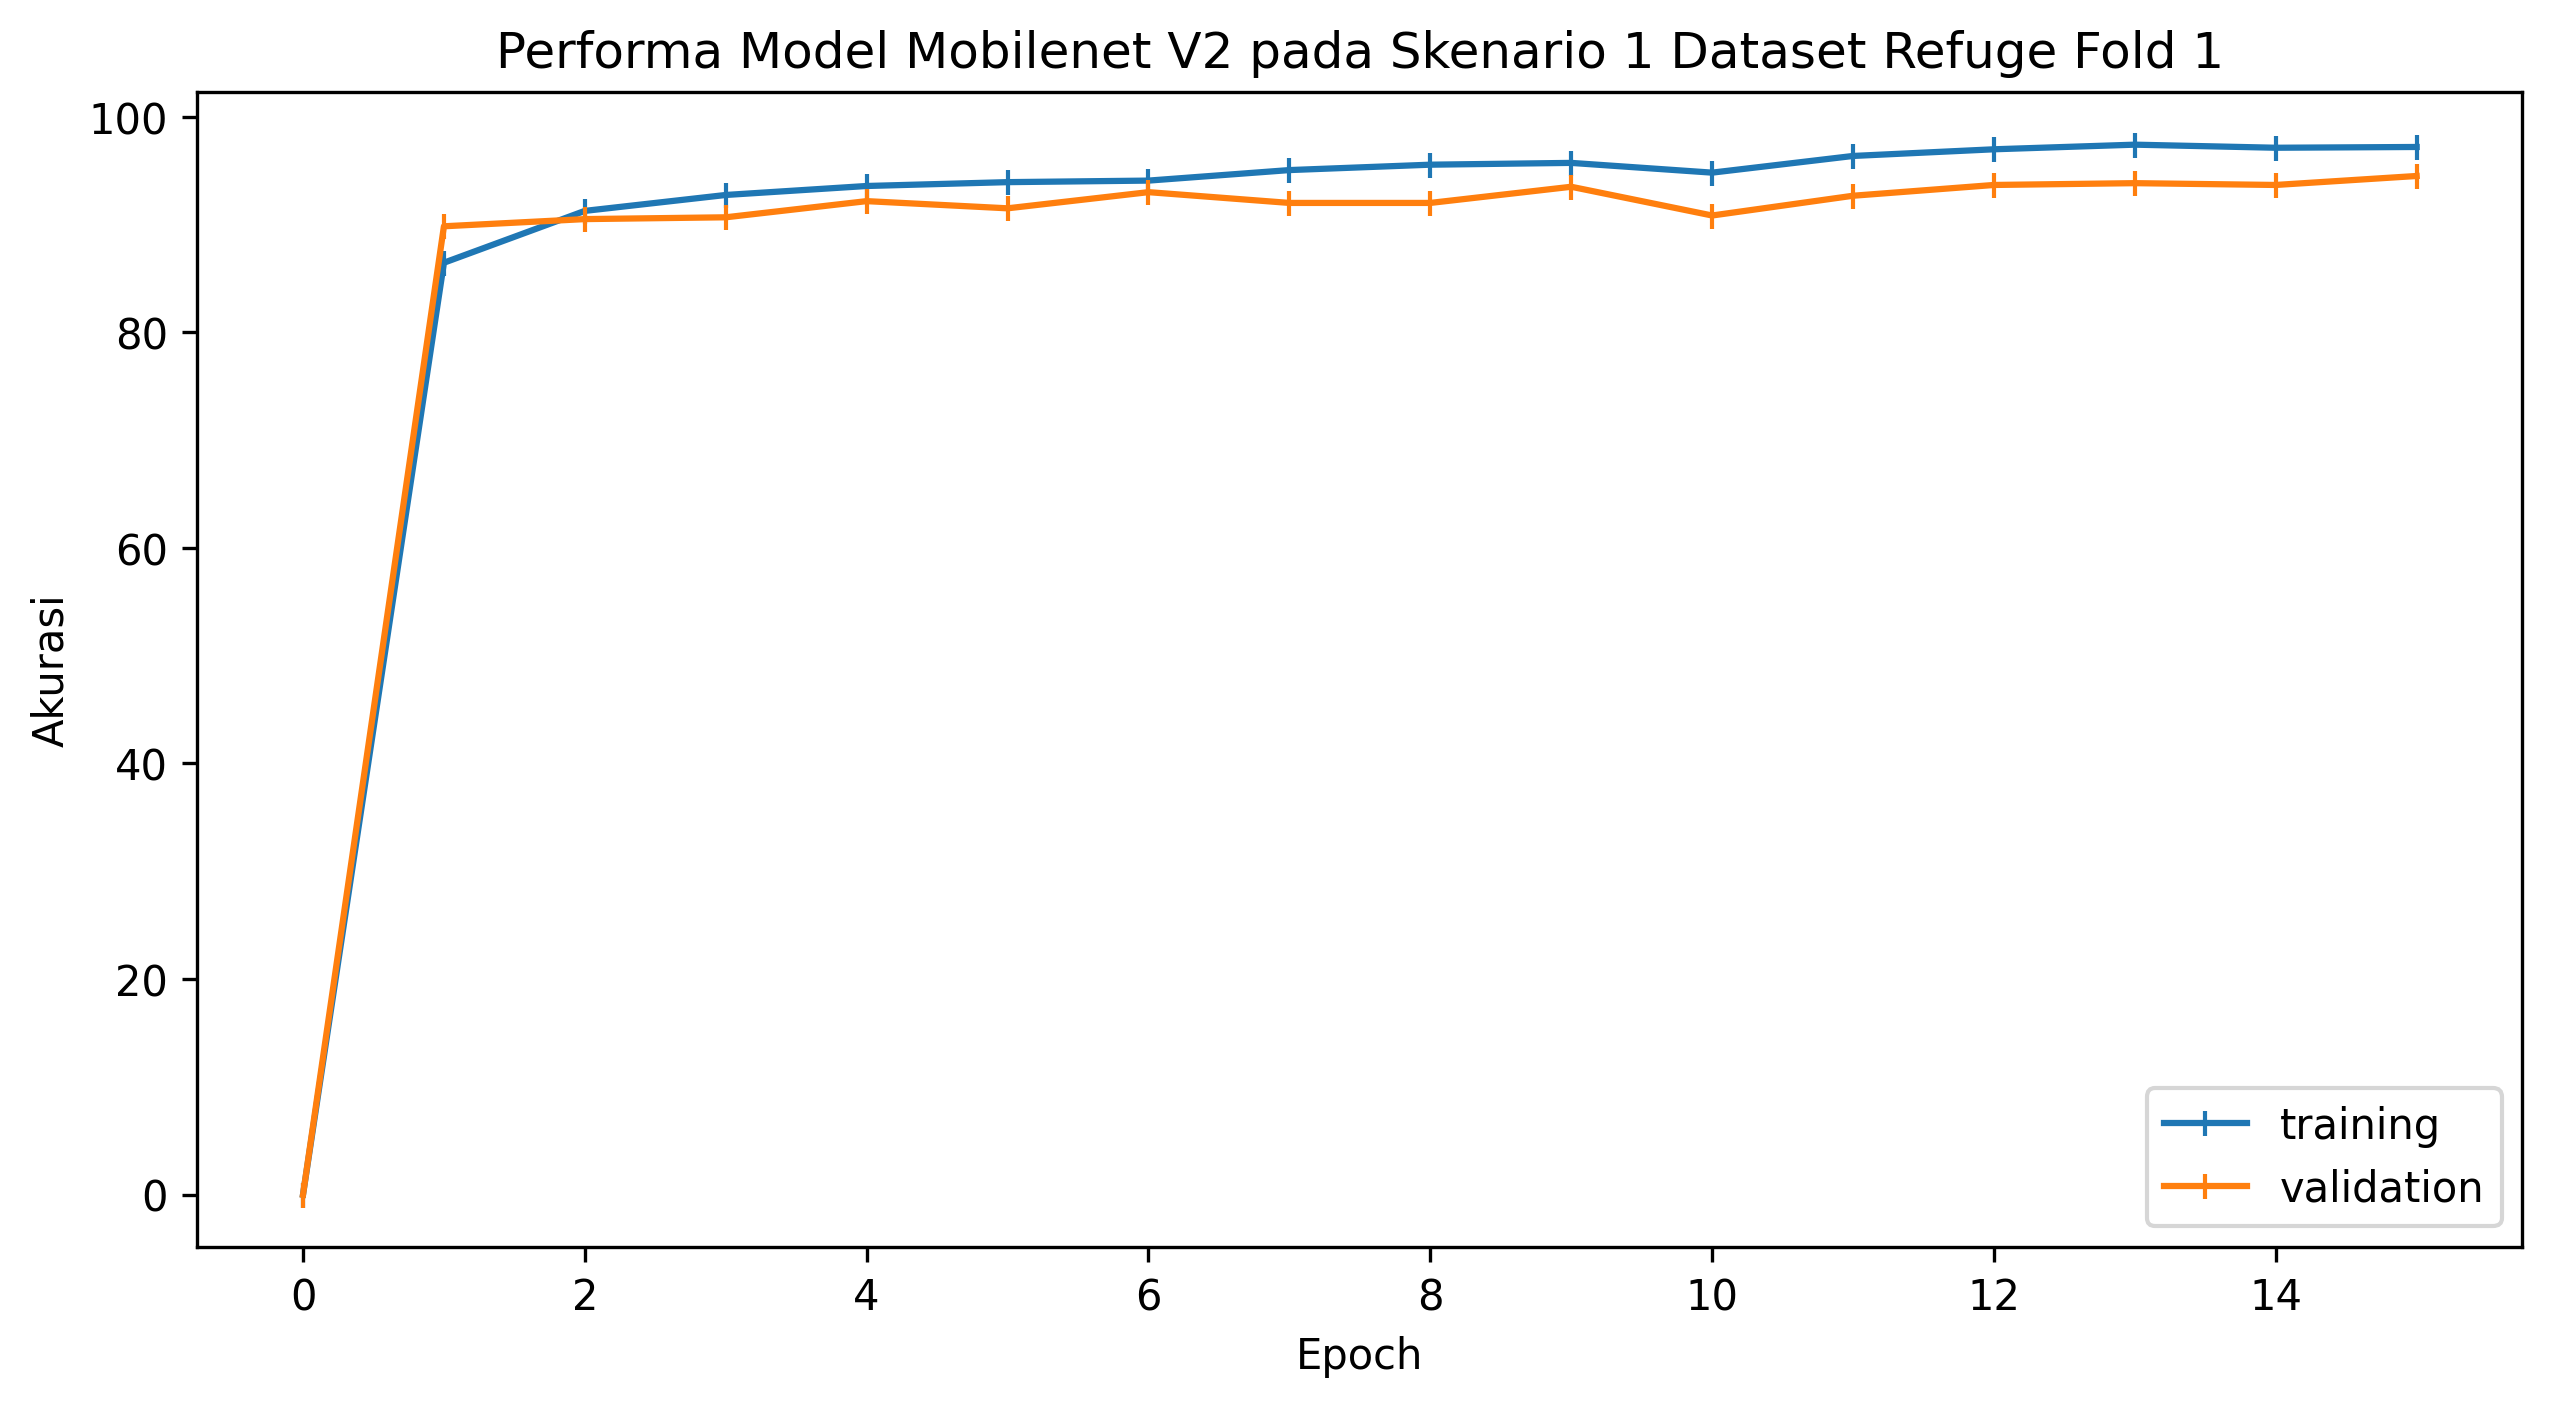

In [67]:
plt.figure(figsize=(10, 5), dpi=300)

plt.plot(df_visualization.epoch, df_visualization.acc,
        marker='|', label='training')
plt.plot(df_visualization.epoch, df_visualization.val_acc,
        marker='|', label='validation')

plt.title('Performa Model Mobilenet V2 pada Skenario 1 Dataset Refuge Fold 1',
        fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.savefig(os.path.join(path_data, 'best_model.png'),
            dpi=300, bbox_inches='tight')
plt.show()